<h1 style="background-color:#0e1096;
           color:#FFF9ED;
           font-size:40px;
           font-family:Georgia;
           text-align:center;
           border-radius:20px 20px;">
    <strong>PREDICTING BANK CUSTOMER CHURN!</strong></h1><br>
    
## <span style='color:Maroon'> JOB-A-THON SOLUTION  </span>

## <span style='color:Blue'> Understanding Problem Statement</span>
Decreasing the Customer Churn is a key goal for any business. Predicting Customer Churn (also known as Customer Attrition) represents an additional potential revenue source for any business. Customer Churn impacts the cost to the business. Higher Customer Churn leads to loss in revenue and the additional marketing costs involved with replacing those customers with new ones. 

In this challenge, as a data scientist of a bank, you are asked to analyze the past data and predict whether the customer will churn or not in the next 6 months. This would help the bank to have the right engagement with customers at the right time.


Objective
Our objective is to build a machine learning model to predict whether the customer will churn or not in the next six months.




<h2 style="background-color:#660066;
           color:#FFF9ED;
           font-size:30px;
           font-family:Georgia;
           text-align:center;
           border-radius:10px 10px;">
    <strong>Data Dictionary</strong></h2><br>

# <span style='color:Blue'> Training Data set  </span>


train.csv contains the customer demographics and past activity with the bank. And also the target label representing whether the customer will churn or not.

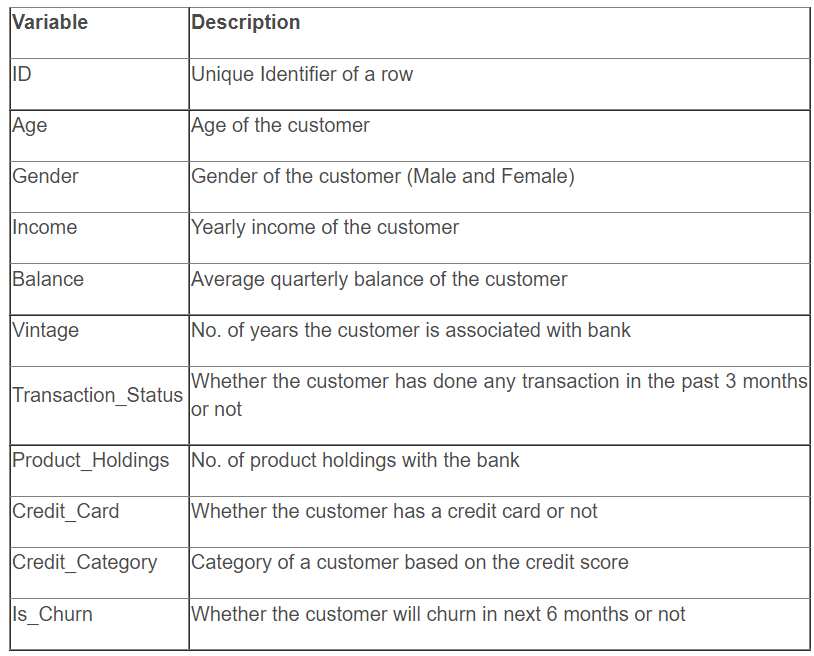

In [1]:
from IPython.display import Image

PATH = "D:/PYTHON_PROGRAMING/MY_STUDIES/JOBATHONE_APPROACH/MARCH_22_CHURN_PREDICTION/"
Image(filename = PATH + "traindata.png", width=400, height=600)

# <span style='color:Blue'> Test Data set  </span>

test.csv contains the customer demographics and past activity with the bank. And you need to predict whether the customer will churn or not.


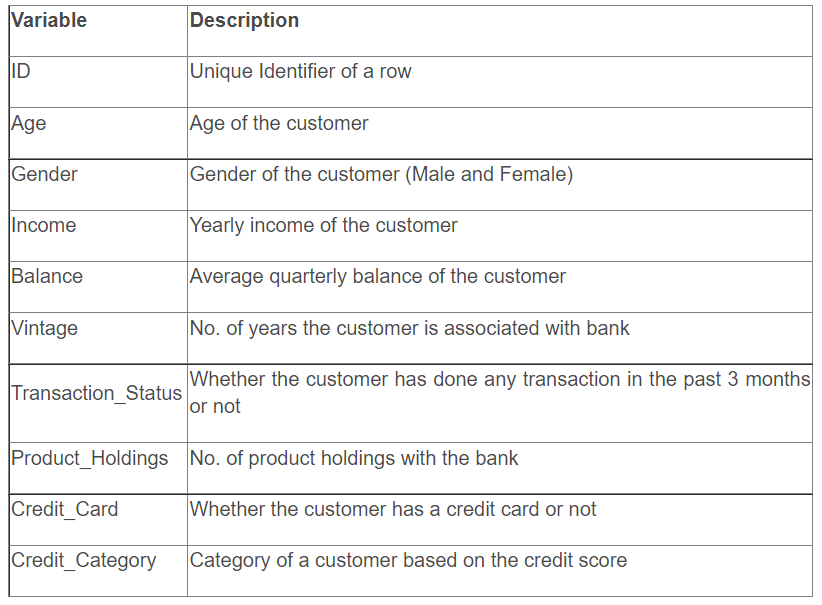

In [2]:
PATH = "D:/PYTHON_PROGRAMING/MY_STUDIES/JOBATHONE_APPROACH/MARCH_22_CHURN_PREDICTION/"
Image(filename = PATH + "testdata.png", width=400, height=600)

<h1 style="background-color:#e00d73;
           color:#FFF9ED;
           font-size:40px;
           font-family:Georgia;
           text-align:center;
           border-radius:10px 10px;">
    <strong>Data set review & preparation</strong></h1><br>

In this section we will seek to explore the structure of our data:

To understand the input datasets & to prepare datasets for exploratory and prediction tasks in later sections

# <span style='color:Blue'> Importing necessary libraries  </span>

In [3]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import warnings
warnings.filterwarnings("ignore")


In [4]:
import xgboost as xgb
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,validation_curve,StratifiedKFold,KFold
from sklearn.model_selection import ShuffleSplit

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesRegressor, RandomForestClassifier



from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection


#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import precision_recall_curve,average_precision_score
from sklearn.metrics import auc, roc_auc_score,roc_curve
from sklearn.metrics import make_scorer, log_loss

In [5]:
%matplotlib inline

class color:
   BLUE = '\033[94m'
   BOLD = '\033[1m'
   END = '\033[0m'

# <span style='color:Blue'> Load Data Sets  </span>


In [6]:
# Read the data frame
train_data = pd.read_csv('train_PDjVQMB.csv')
test_data = pd.read_csv('test_lTY72QC.csv')

<h2 style="background-color:#660066;
           color:#FFF9ED;
           font-size:30px;
           font-family:Georgia;
           text-align:center;
           border-radius:10px 10px;">
    <strong>Data Overview</strong></h2><br>

Let us look at the data.

# <span style='color:Blue'> Training Data set  </span>


In [7]:
train_data.columns

Index(['ID', 'Age', 'Gender', 'Income', 'Balance', 'Vintage',
       'Transaction_Status', 'Product_Holdings', 'Credit_Card',
       'Credit_Category', 'Is_Churn'],
      dtype='object')

In [8]:
train_data.head()

ID  Age  Gender         Income     Balance  Vintage  \
0  84e2fcc9   36  Female       5L - 10L   563266.44        4   
1  57fea15e   53  Female   Less than 5L   875572.11        2   
2  8df34ef3   35  Female  More than 15L   701607.06        2   
3  c5c0788b   43  Female  More than 15L  1393922.16        0   
4  951d69c4   39  Female  More than 15L   893146.23        1   

   Transaction_Status Product_Holdings  Credit_Card Credit_Category  Is_Churn  
0                   0                1            0         Average         1  
1                   1                1            1            Poor         0  
2                   1                2            0            Poor         0  
3                   1                2            1            Poor         1  
4                   1                1            1            Good         1

In [9]:
print(color.BOLD + "There are {} rows and {} columns in the dataset.".format(train_data.shape[0],train_data.shape[1]),"\n"+ color.END)
print("The first column is ID COLUMN which can be deleted","\n")
train_data.drop('ID', axis=1, inplace=True)
print(color.BOLD +color.BLUE +"Let's look at the data types available in the dataset"+ color.END)
train_data.info()
print(color.BOLD +color.BLUE +"\n","Summary statistics of dataset"+ color.END)
train_data.describe()

There are 6650 rows and 11 columns in the dataset. 

The first column is ID COLUMN which can be deleted 

Let's look at the data types available in the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 6650 non-null   int64  
 1   Gender              6650 non-null   object 
 2   Income              6650 non-null   object 
 3   Balance             6650 non-null   float64
 4   Vintage             6650 non-null   int64  
 5   Transaction_Status  6650 non-null   int64  
 6   Product_Holdings    6650 non-null   object 
 7   Credit_Card         6650 non-null   int64  
 8   Credit_Category     6650 non-null   object 
 9   Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 519.7+ KB

 Summary statistics of dataset


Age       Balance      Vintage  Transaction_Status  \
count  6650.000000  6.650000e+03  6650.000000         6650.000000   
mean     41.130226  8.045954e+05     2.250226            0.515789   
std       9.685747  5.157549e+05     1.458795            0.499788   
min      21.000000  6.300000e+01     0.000000            0.000000   
25%      34.000000  3.922642e+05     1.000000            0.000000   
50%      40.000000  7.649386e+05     2.000000            1.000000   
75%      47.000000  1.147124e+06     3.000000            1.000000   
max      72.000000  2.436616e+06     5.000000            1.000000   

       Credit_Card     Is_Churn  
count  6650.000000  6650.000000  
mean      0.664361     0.231128  
std       0.472249     0.421586  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       1.000000     0.000000  
75%       1.000000     0.000000  
max       1.000000     1.000000

# <span style='color:Blue'> Test Data set  </span>


In [10]:
test_data.columns

Index(['ID', 'Age', 'Gender', 'Income', 'Balance', 'Vintage',
       'Transaction_Status', 'Product_Holdings', 'Credit_Card',
       'Credit_Category'],
      dtype='object')

In [11]:
test_data.head()

ID  Age  Gender         Income     Balance  Vintage  \
0  55480787   50  Female  More than 15L  1008636.39        2   
1  9aededf2   36    Male       5L - 10L   341460.72        2   
2  a5034a09   25  Female      10L - 15L   439460.10        0   
3  b3256702   41    Male   Less than 5L    28581.93        0   
4  dc28adb5   48    Male  More than 15L  1104540.03        2   

   Transaction_Status Product_Holdings  Credit_Card Credit_Category  
0                   1                2            1         Average  
1                   0                2            1         Average  
2                   0                2            1            Good  
3                   1                2            1            Poor  
4                   1               3+            0            Good

In [12]:
print(color.BOLD + "There are {} rows and {} columns in the dataset.".format(test_data.shape[0],train_data.shape[1]),"\n"+ color.END)
print("The first column is ID COLUMN which will be ignored for model building","\n")
#test_data.drop('ID', axis=1, inplace=True)
print(color.BOLD +color.BLUE +"Let's look at the data types available in the dataset"+ color.END)
test_data.info()
print(color.BOLD +color.BLUE +"\n","Summary statistics of dataset"+ color.END)
test_data.describe()

There are 2851 rows and 10 columns in the dataset. 

The first column is ID COLUMN which will be ignored for model building 

Let's look at the data types available in the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2851 non-null   object 
 1   Age                 2851 non-null   int64  
 2   Gender              2851 non-null   object 
 3   Income              2851 non-null   object 
 4   Balance             2851 non-null   float64
 5   Vintage             2851 non-null   int64  
 6   Transaction_Status  2851 non-null   int64  
 7   Product_Holdings    2851 non-null   object 
 8   Credit_Card         2851 non-null   int64  
 9   Credit_Category     2851 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 222.9+ KB

 Summary statistics of dataset


Age       Balance      Vintage  Transaction_Status  Credit_Card
count  2851.000000  2.851000e+03  2851.000000         2851.000000  2851.000000
mean     41.252192  8.098990e+05     2.220975            0.506840     0.668888
std       9.616756  5.252003e+05     1.489941            0.500041     0.470696
min      21.000000  1.503000e+03     0.000000            0.000000     0.000000
25%      34.000000  4.009684e+05     1.000000            0.000000     0.000000
50%      40.000000  7.659125e+05     2.000000            1.000000     1.000000
75%      47.000000  1.154238e+06     3.000000            1.000000     1.000000
max      72.000000  2.434834e+06     5.000000            1.000000     1.000000

<h2 style="background-color:#660066;
           color:#FFF9ED;
           font-size:30px;
           font-family:Georgia;
           text-align:center;
           border-radius:10px 10px;">
    <strong>Missing  Value Treatment</strong></h2><br>
    
# <span style='color:Blue'> Check for null/ nan in Dataset  </span>

In [13]:
def checknull(df):
    # printing column name where null is present
    col_name = df.isnull().sum(axis=0).sort_values(ascending = False)
    print(col_name)    

In [14]:
print(color.BOLD +"printing column name where null is present in train data"+ color.END, '\n')
checknull(train_data)
print(color.BOLD +"printing column name where null is present in test data"+ color.END, '\n')
checknull(test_data)

printing column name where null is present in train data 

Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64
printing column name where null is present in test data 

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
dtype: int64


In [15]:
print(color.BOLD +"There are no null values in both test and train data.","\n"+ color.END)

There are no null values in both test and train data. 



<h1 style="background-color:#e00d73;
           color:#FFF9ED;
           font-size:40px;
           font-family:Georgia;
           text-align:center;
           border-radius:10px 10px;">
    <strong>EDA on Train Data</strong></h1><br>

<h2 style="background-color:#660066;
           color:#FFF9ED;
           font-size:30px;
           font-family:Georgia;
           text-align:center;
           border-radius:10px 10px;">
    <strong>Checking Distribution of Categorical Variables</strong></h2><br>

# <span style='color:Blue'> Distribution of target Variable Is_Churn  </span>

In [16]:

labels = 'to stay', 'to exit'
sizes = train_data['Is_Churn'].value_counts()
sizes

0    5113
1    1537
Name: Is_Churn, dtype: int64

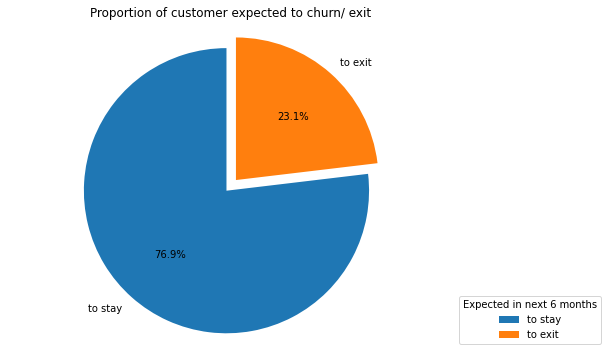

In [17]:
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer expected to churn/ exit", size = 12)
ax1.legend(labels,bbox_to_anchor=(1, 0),loc='lower left', title='Expected in next 6 months')

plt.show()

It is given that about 23% of the customers might churn in the next 6 months. So the baseline model could be to predict that 23% of the customers will churn. Given 23% is a small number, we need to ensure that the chosen model does predict with great accuracy this 23% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

## <span style='color:blue'>  Relation Between Categorical Variables And Target Variable Is_churn </span>

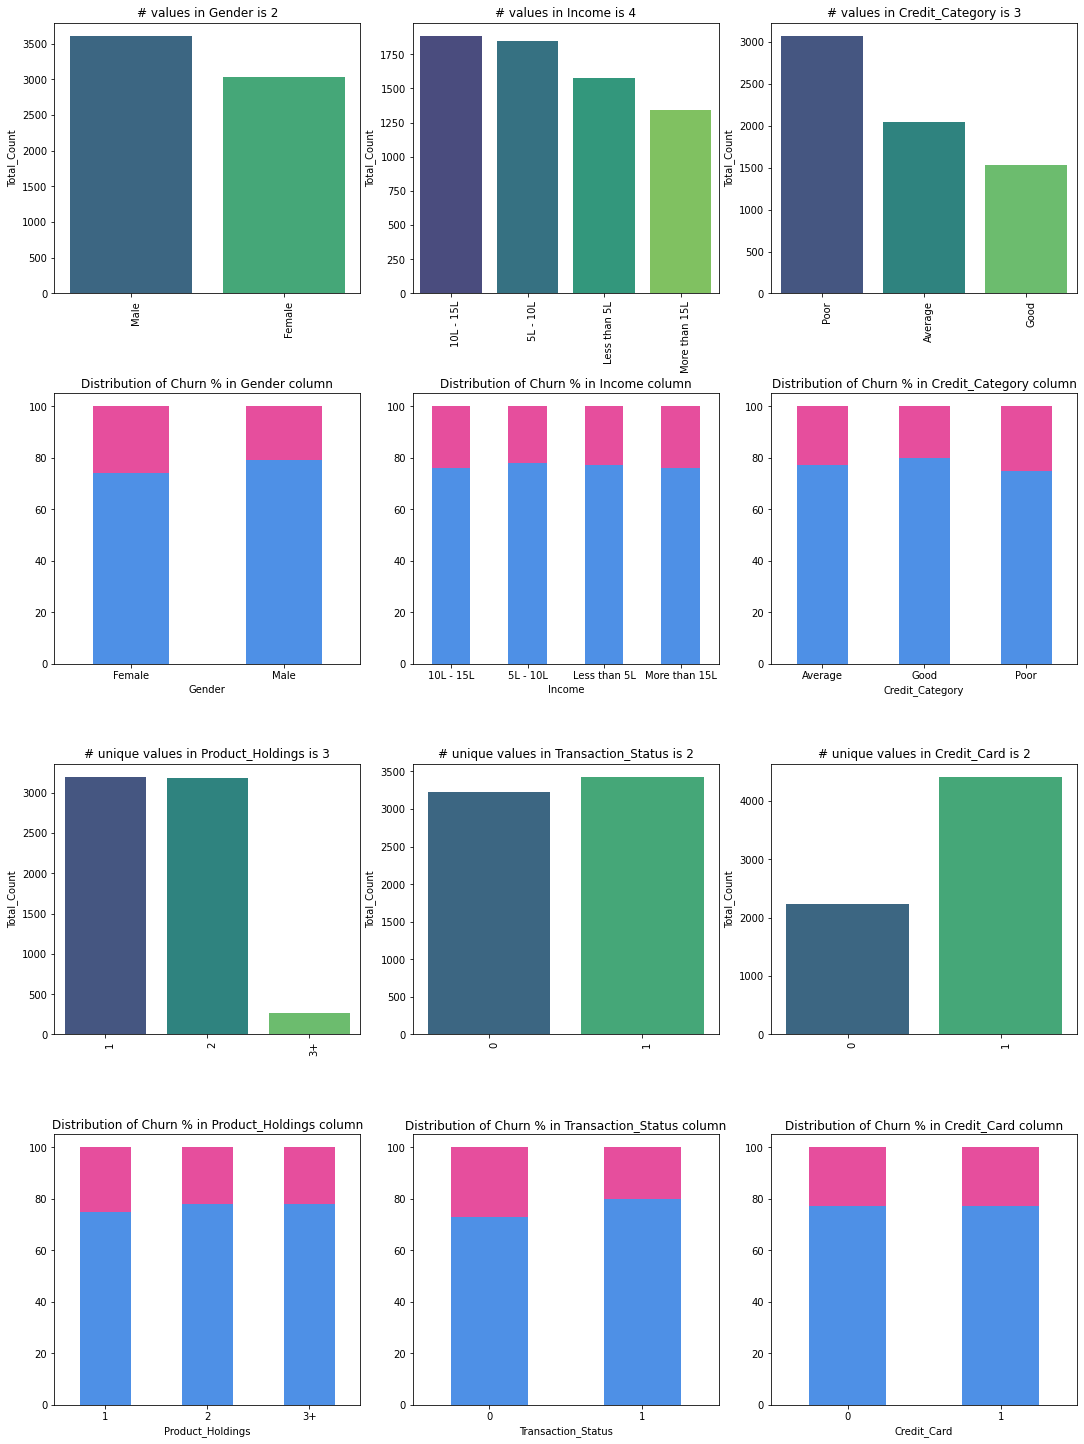

In [18]:
%matplotlib inline
cat_column_list = ['Gender','Income', 'Credit_Category','Product_Holdings','Transaction_Status', 'Credit_Card']
colors = ['#4e90e6','#e64e9d']


fig, axes = plt.subplots(nrows = 4,ncols = 3,figsize = (15, 20))

for i, column in enumerate(cat_column_list):
    count_uniques = pd.DataFrame(train_data[column].value_counts()).rename(columns={column:'Total_Count'}).sort_values('Total_Count',ascending=False)
    crosstab = pd.crosstab(train_data[column],train_data.Is_Churn).apply(lambda r: r/r.sum(), axis=1).apply(lambda r: r*100, axis=1).round(0)
    
    if i < 3:

        ax = sns.barplot(x=count_uniques.index.values.tolist()  , y="Total_Count", data=count_uniques, palette= 'viridis', ax=axes[0,i])
        plt.setp( ax.xaxis.get_majorticklabels(), rotation=90, ha="left" )
        title_ = "# values in {} is {}".format(column, count_uniques.shape[0])
        ax.set_title(title_)

        # Creating barplot
        title_ = "Distribution of Churn % in {} column".format(column)
        barplot = crosstab.plot.bar(rot=0, stacked=True,title=title_, ax=axes[1,i], legend=False,color = colors)
        
    elif i >=3 and i < 6:
        
        ax = sns.barplot(x=count_uniques.index.values.tolist()  , y="Total_Count", data=count_uniques, palette= 'viridis', ax=axes[2,i-3])
        plt.setp( ax.xaxis.get_majorticklabels(), rotation=90, ha="left" )
        title_ = "# unique values in {} is {}".format(column, count_uniques.shape[0])
        ax.set_title(title_)
        
        # Creating barplot
        title_ = "Distribution of Churn % in {} column".format(column)
        barplot = crosstab.plot.bar(rot=0, stacked=True,title=title_, ax=axes[3,i-3], legend=False,color = colors)

fig.tight_layout(pad=.5)

We note the following:

* The proportion of female customers churning is greater than that of male customers.Bank should rollout promotions to retain female customers.
* Those with 5L-10L salary churn less compared to other income bands. 
* Naturally belonging to poor credit category are more likely to churn
* Customers with more product holdings are less likely to churn. so, the Bank needs to focus on encouraging more customers to have more product holdings which will discourage the customers to leave the service.
* Unsurprisingly those who did not make any transaction in the last 3 months are likely to churn

Interestingly, no difference in the churn rate for those having credit card and not. <br>
A cause of concern, overall proportion of inactive meMbers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.

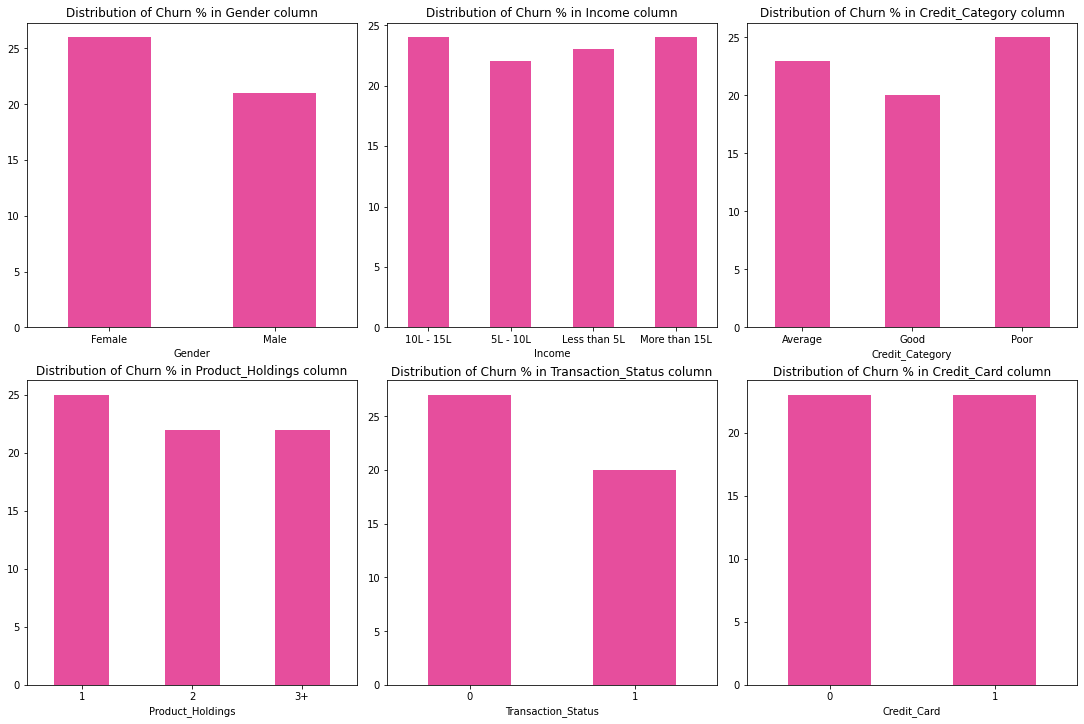

In [19]:
%matplotlib inline
cat_column_list = ['Gender','Income', 'Credit_Category','Product_Holdings','Transaction_Status', 'Credit_Card']

fig, axes = plt.subplots(nrows = 2,ncols = 3,figsize = (15, 10))

for i, column in enumerate(cat_column_list):
    crosstab = pd.crosstab(train_data[column],train_data.Is_Churn).apply(lambda r: r/r.sum(), axis=1).apply(lambda r: r*100, axis=1).round(0)
    crosstab.drop(crosstab.iloc[:, :1], inplace = True, axis = 1)
    
    if i < 3:
        # Creating barplot
        title_ = "Distribution of Churn % in {} column".format(column)
        barplot = crosstab.plot.bar(rot=0, title=title_, ax=axes[0,i], legend=False, color='#e64e9d')
        
    elif i >=3 and i < 6:

        title_ = "Distribution of Churn % in {} column".format(column)
        barplot = crosstab.plot.bar(rot=0, title=title_, ax=axes[1,i-3], legend=False, color='#e64e9d')

fig.tight_layout(pad=.5)

<h2 style="background-color:#660066;
           color:#FFF9ED;
           font-size:30px;
           font-family:Georgia;
           text-align:center;
           border-radius:10px 10px;">
    <strong>Checking Distribution of Numeric Variables</strong></h2><br>

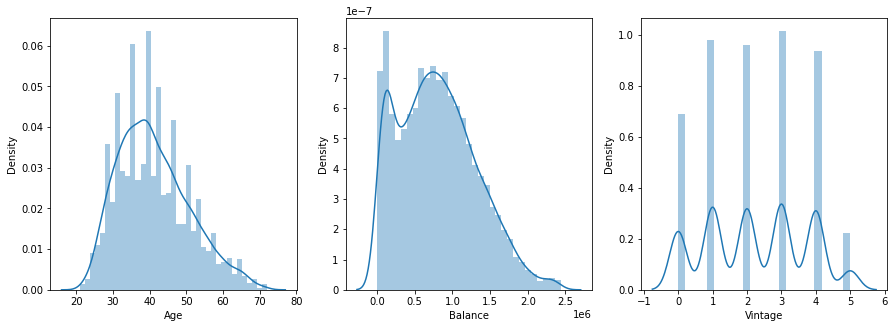

In [20]:
row_nums = 1  # how many rows of plots
col_nums = 3  # how many plots per row

# Create the subplots
fig, (ax1,ax2,ax3) = plt.subplots(nrows=row_nums, ncols=col_nums, figsize=(15, 5))
sns.distplot(train_data['Age'],ax=ax1)
sns.distplot(train_data['Balance'],ax=ax2)
sns.distplot(train_data['Vintage'],ax=ax3);

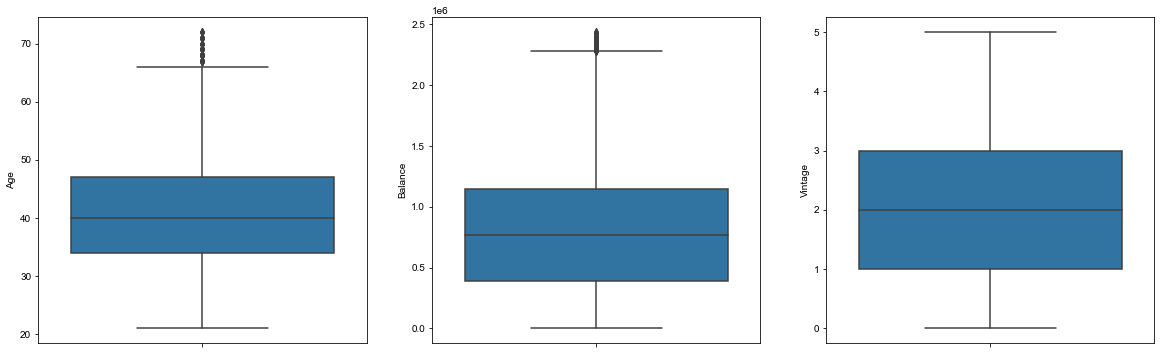

In [21]:
# Relations based on the continuous data attributes
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20, 6))
sns.set_style("whitegrid")

sns.boxplot(y=train_data['Age'],ax=ax1)
sns.boxplot(y=train_data['Balance'],ax=ax2)
sns.boxplot(y=train_data['Vintage'],ax=ax3);

In [22]:
train_data[['Age', 'Balance', 'Vintage']].agg(['skew', 'kurtosis']).transpose()

skew  kurtosis
Age      0.555171 -0.153919
Balance  0.464460 -0.318742
Vintage  0.021421 -1.066870

As rule of thumb, skewness can be interpreted like this: <br>

Skewness<br>
Fairly Symmetrical	-0.5 to 0.5<br>
Moderate Skewed	-0.5 to -1.0 and 0.5 to 1.0<br>
Highly Skewed	< -1.0 and > 1.0<br>

distribution of numeric variables are fairly symmetrical

## <span style='color:blue'>  Relation Between Numeric Variable And Target Variable Is_churn </span>


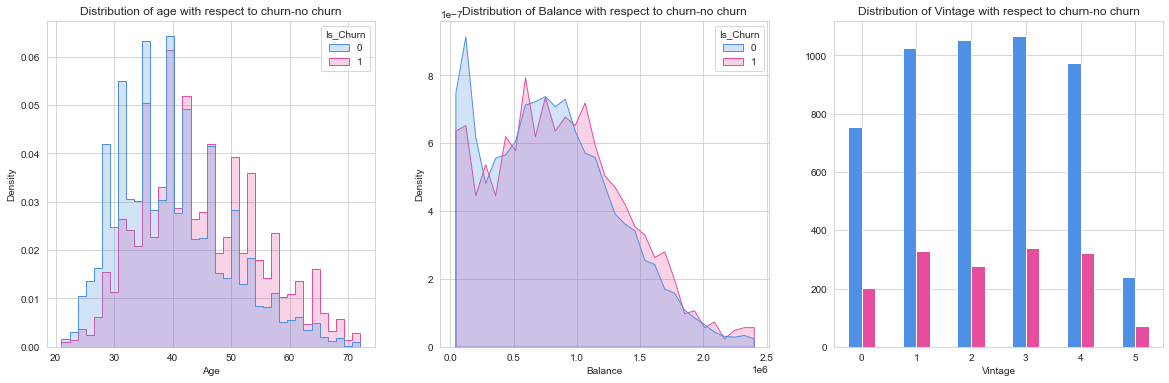

In [23]:
# Relations based on the continuous data attributes
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20, 6))

sns.histplot(train_data, x="Age", hue="Is_Churn", element="step",
             stat="density", common_norm=False, ax=ax1, palette=colors).set(title='Distribution of age with respect to churn-no churn')

sns.histplot(train_data, x="Balance", hue="Is_Churn", element="poly",
             stat="density", common_norm=False,ax=ax2, palette=colors).set(title='Distribution of Balance with respect to churn-no churn')
crosstab = pd.crosstab(train_data['Vintage'],train_data.Is_Churn)
barplot = crosstab.plot.bar(rot=0, title='Distribution of Vintage with respect to churn-no churn', ax=ax3, legend=False, color= colors)


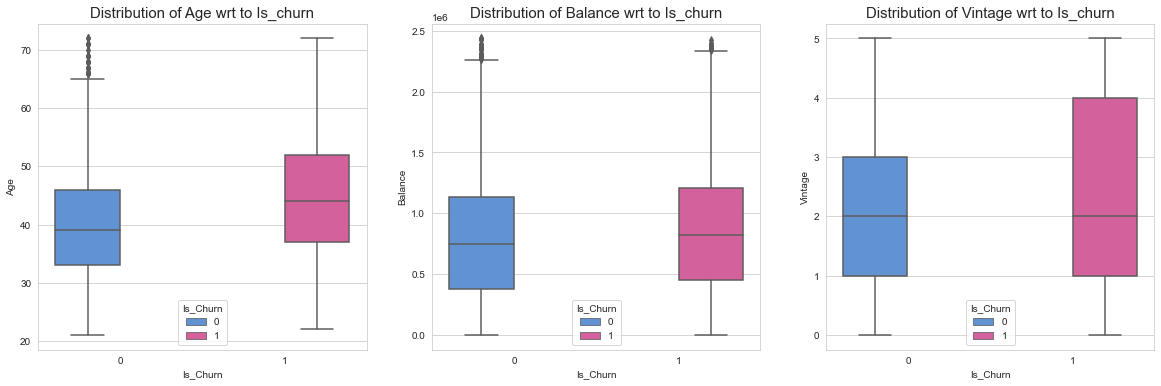

In [24]:
# Relations based on the continuous data attributes
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20, 6))

fontdict={'fontsize': 15}



sns.set_style("whitegrid")
sns.boxplot(x="Is_Churn", y="Age", hue="Is_Churn", data=train_data, ax=ax1, palette= colors).set_title('Distribution of Age wrt to Is_churn', fontdict=fontdict)
sns.boxplot(x="Is_Churn", y="Balance", hue="Is_Churn", data=train_data, ax=ax2, palette= colors).set_title('Distribution of Balance wrt to Is_churn', fontdict=fontdict)
sns.boxplot(x="Is_Churn", y="Vintage", hue="Is_Churn", data=train_data, ax=ax3, palette= colors).set_title('Distribution of Vintage wrt to Is_churn', fontdict=fontdict);

We note the following:

The older customers are churning more than the younger ones. The bank may need to review their target market or review the strategy for retention between the different age groups.<br>
Even customers have been associated with the bank for about 4 years are leaving.<br>

<h2 style="background-color:#660066;
           color:#FFF9ED;
           font-size:30px;
           font-family:Georgia;
           text-align:center;
           border-radius:10px 10px;">
    <strong>Correlation between numeric variables</strong></h2><br>    
    
## <span style='color:blue'> Relation between 'Age', 'Balance', 'Vintage'  </span>


              Age   Balance   Vintage
Age      1.000000  0.002154  0.017353
Balance  0.002154  1.000000 -0.019385
Vintage  0.017353 -0.019385  1.000000


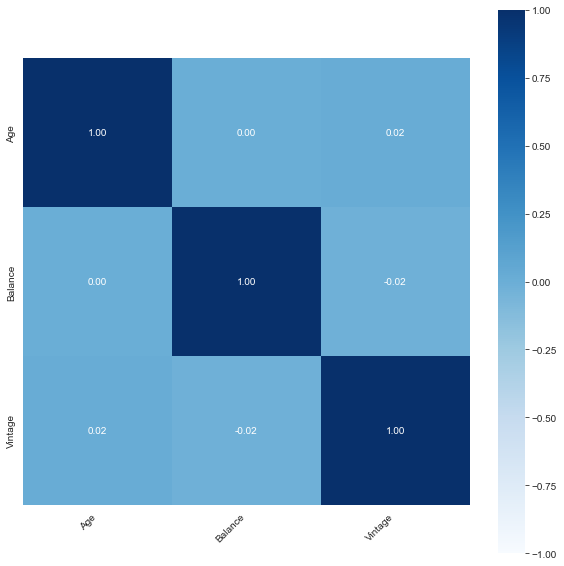

In [25]:
%matplotlib inline
corr = train_data[['Age', 'Balance', 'Vintage']].corr()
print(corr)

fig, ax = plt.subplots(figsize=(10,10))
#ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap= sns.diverging_palette(20, 220, as_cmap=True), square=True, annot=True, fmt='.1f')
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap= 'Blues', square=True, annot=True, fmt='.2f')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right');

There is not much correlation between the numeric variables

<h1 style="background-color:#e00d73;
           color:#FFF9ED;
           font-size:40px;
           font-family:Georgia;
           text-align:center;
           border-radius:10px 10px;">
    <strong>Feature Engineering</strong></h1><br>

<h2 style="background-color:#660066;
           color:#FFF9ED;
           font-size:30px;
           font-family:Georgia;
           text-align:center;
           border-radius:10px 10px;">
    <strong>Checking for Outliers</strong></h2><br>   

In [26]:
train_data[['Age', 'Balance', 'Vintage']].describe()

Age       Balance      Vintage
count  6650.000000  6.650000e+03  6650.000000
mean     41.130226  8.045954e+05     2.250226
std       9.685747  5.157549e+05     1.458795
min      21.000000  6.300000e+01     0.000000
25%      34.000000  3.922642e+05     1.000000
50%      40.000000  7.649386e+05     2.000000
75%      47.000000  1.147124e+06     3.000000
max      72.000000  2.436616e+06     5.000000

In [27]:
#get percentile value to understand outliers
def percentile_col(column):
    print(color.BOLD +'Percentile values In {} column'.format(column)+ color.END)
    print("80th percentile value {}".format(train_data[column].quantile(0.8))) # 80th percentile
    print("85th percentile value {}".format(train_data[column].quantile(0.85))) # 8th percentile    
    print("90th percentile value {}".format(train_data[column].quantile(0.90))) # 90th percentile    
    print("95th percentile value {}".format(train_data[column].quantile(0.95))) # 95th percentile
    print("99th percentile value {}".format(train_data[column].quantile(0.99))) # 99th percentile

    print(''+'\n')


In [28]:
for column in ['Age', 'Balance']:
    percentile_col(column)


Percentile values In Age column
80th percentile value 49.0
85th percentile value 52.0
90th percentile value 55.0
95th percentile value 59.0
99th percentile value 66.0


Percentile values In Balance column
80th percentile value 1248321.5820000004
85th percentile value 1368751.6124999998
90th percentile value 1511154.5219999999
95th percentile value 1721617.5554999998
99th percentile value 2154397.1733000013




There are no outliers in the numeric variables

<h2 style="background-color:#660066;
           color:#FFF9ED;
           font-size:30px;
           font-family:Georgia;
           text-align:center;
           border-radius:10px 10px;">
    <strong>Convert variables</strong></h2><br>  

In [29]:
save_train_data = train_data.copy()

## Convert categorical variables into numeric values

In [30]:
#train_data['Income'].value_counts()

In [31]:
train_data.replace({'Credit_Category': {'Good': 1, 'Average': .5, 'Poor': 0}}, inplace=True)
#train_data.replace({'Product_Holdings': {'3+': 3, '2': 2, '1': 1}}, inplace=True)
#train_data.replace({'Income': {'Less than 5L': 1, '5L - 10L': 2, '10L - 15L': 3,'More than 15L':4}}, inplace=True)

## Convert categorical variables into Binary variables

In [32]:
train_dummy= pd.concat([pd.get_dummies(train_data[['Gender', 'Income','Product_Holdings']]), train_data[['Age', 'Balance','Vintage','Transaction_Status', 'Credit_Card', 'Credit_Category', 'Is_Churn']]], axis=1)
#train_dummy= pd.concat([pd.get_dummies(train_data[['Gender']]), train_data[['Age', 'Balance','Vintage','Transaction_Status', 'Income','Product_Holdings', 'Credit_Card', 'Credit_Category', 'Is_Churn']]], axis=1)


<h2 style="background-color:#660066;
           color:#FFF9ED;
           font-size:30px;
           font-family:Georgia;
           text-align:center;
           border-radius:10px 10px;">
    <strong>Normalization of data</strong></h2><br>  

In [33]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [34]:
# Check if the data type of all columns 
train_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender_Female         6650 non-null   uint8  
 1   Gender_Male           6650 non-null   uint8  
 2   Income_10L - 15L      6650 non-null   uint8  
 3   Income_5L - 10L       6650 non-null   uint8  
 4   Income_Less than 5L   6650 non-null   uint8  
 5   Income_More than 15L  6650 non-null   uint8  
 6   Product_Holdings_1    6650 non-null   uint8  
 7   Product_Holdings_2    6650 non-null   uint8  
 8   Product_Holdings_3+   6650 non-null   uint8  
 9   Age                   6650 non-null   int64  
 10  Balance               6650 non-null   float64
 11  Vintage               6650 non-null   int64  
 12  Transaction_Status    6650 non-null   int64  
 13  Credit_Card           6650 non-null   int64  
 14  Credit_Category       6650 non-null   float64
 15  Is_Churn             

In [35]:
    train_dummy.loc[:, ['Age', 'Balance', 'Vintage','Credit_Category']]= NormalizeData(train_dummy.loc[:, ['Age', 'Balance', 'Vintage','Credit_Category']])
#train_dummy.loc[:, ['Age', 'Balance', 'Vintage','Credit_Category', 'Income','Product_Holdings']]= NormalizeData(train_dummy.loc[:, ['Age', 'Balance', 'Vintage','Credit_Category', 'Income','Product_Holdings']])


In [36]:
train_dummy.describe()

Gender_Female  Gender_Male  Income_10L - 15L  Income_5L - 10L  \
count    6650.000000  6650.000000       6650.000000      6650.000000   
mean        0.456842     0.543158          0.283459         0.277744   
std         0.498171     0.498171          0.450711         0.447920   
min         0.000000     0.000000          0.000000         0.000000   
25%         0.000000     0.000000          0.000000         0.000000   
50%         0.000000     1.000000          0.000000         0.000000   
75%         1.000000     1.000000          1.000000         1.000000   
max         1.000000     1.000000          1.000000         1.000000   

       Income_Less than 5L  Income_More than 15L  Product_Holdings_1  \
count          6650.000000           6650.000000         6650.000000   
mean              0.236541              0.202256            0.481203   
std               0.424990              0.401712            0.499684   
min               0.000000              0.000000            0.000000   
25%               0.000000              0.000000            0.000000   
50%               0.000000              0.000000            0.000000   
75%               0.000000              0.000000            1.000000   
max               1.000000              1.000000            1.000000   

       Product_Holdings_2  Product_Holdings_3+          Age      Balance  \
count         6650.000000          6650.000000  6650.000000  6650.000000   
mean             0.478496             0.040301     0.394710     0.330193   
std              0.499575             0.196678     0.189917     0.211674   
min              0.000000             0.000000     0.000000     0.000000   
25%              0.000000             0.000000     0.254902     0.160966   
50%              0.000000             0.000000     0.372549     0.313917   
75%              1.000000             0.000000     0.509804     0.470772   
max              1.000000             1.000000     1.000000     1.000000   

           Vintage  Transaction_Status  Credit_Card  Credit_Category  \
count  6650.000000         6650.000000  6650.000000      6650.000000   
mean      0.450045            0.515789     0.664361         0.383835   
std       0.291759            0.499788     0.472249         0.399656   
min       0.000000            0.000000     0.000000         0.000000   
25%       0.200000            0.000000     0.000000         0.000000   
50%       0.400000            1.000000     1.000000         0.500000   
75%       0.600000            1.000000     1.000000         0.500000   
max       1.000000            1.000000     1.000000         1.000000   

          Is_Churn  
count  6650.000000  
mean      0.231128  
std       0.421586  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

<h2 style="background-color:#660066;
           color:#FFF9ED;
           font-size:30px;
           font-family:Georgia;
           text-align:center;
           border-radius:10px 10px;">
    <strong>Checking correlation between variables</strong></h2><br>  

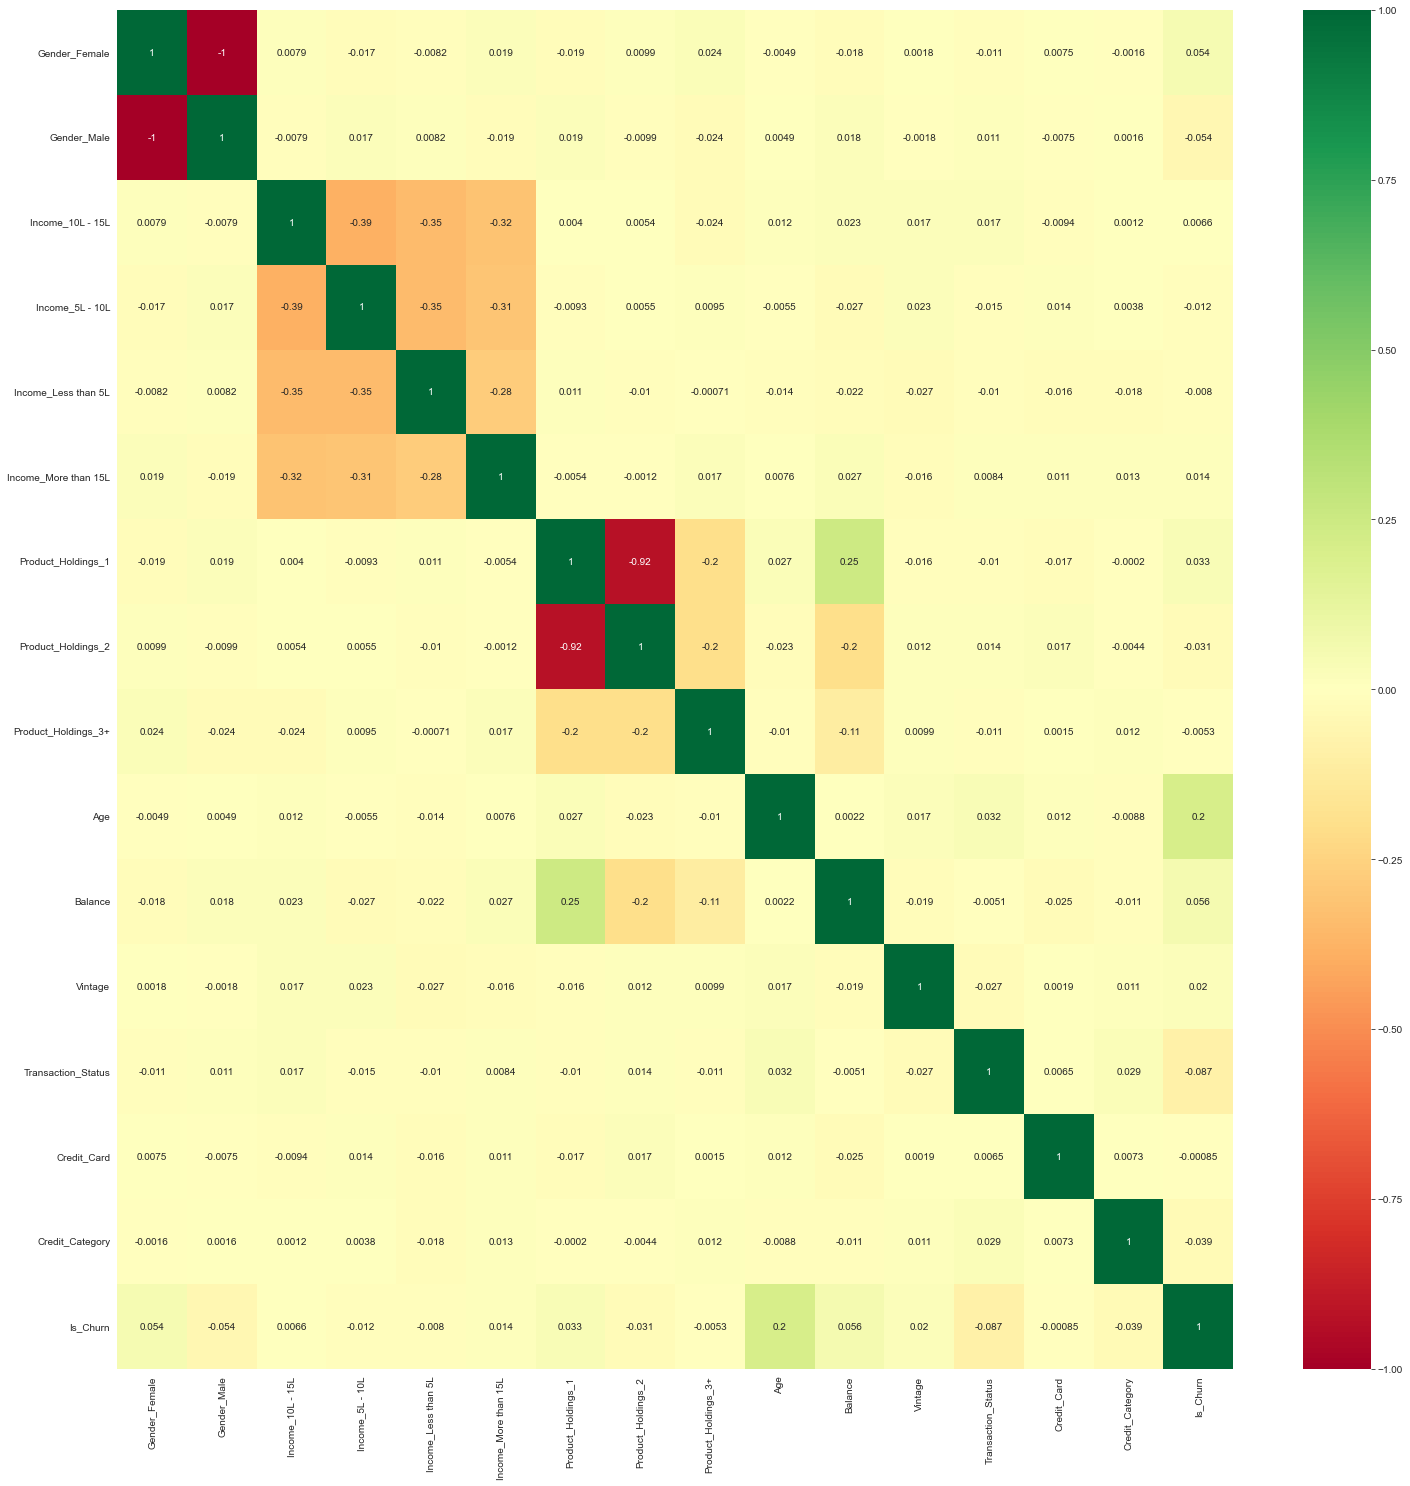

In [37]:
corrmat=train_dummy.corr(method ='pearson')
top_corr_features=corrmat.index
plt.figure(figsize=(25,25))
#plot heat map
g=sns.heatmap(train_dummy[top_corr_features].corr(), vmin=-1, vmax=1, center=0,annot=True,cmap="RdYlGn")

## Find positive and negative correlations:

In [38]:
correlations = train_dummy.loc[:, train_dummy.columns!='Is_Churn'] .corrwith(train_dummy['Is_Churn'])
correlations = correlations[correlations!=1]

positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)
print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)


Most Positive Correlations: 
 Age                     0.204301
Balance                 0.056380
Gender_Female           0.053589
Product_Holdings_1      0.033120
Vintage                 0.020152
Income_More than 15L    0.014327
Income_10L - 15L        0.006589
dtype: float64

Most Negative Correlations: 
 Credit_Card           -0.000848
Product_Holdings_3+   -0.005337
Income_Less than 5L   -0.008028
Income_5L - 10L       -0.011862
Product_Holdings_2    -0.031027
Credit_Category       -0.038788
Gender_Male           -0.053589
Transaction_Status    -0.086917
dtype: float64


Text(0.5, 1.0, 'Correlation with Churn Rate \n')

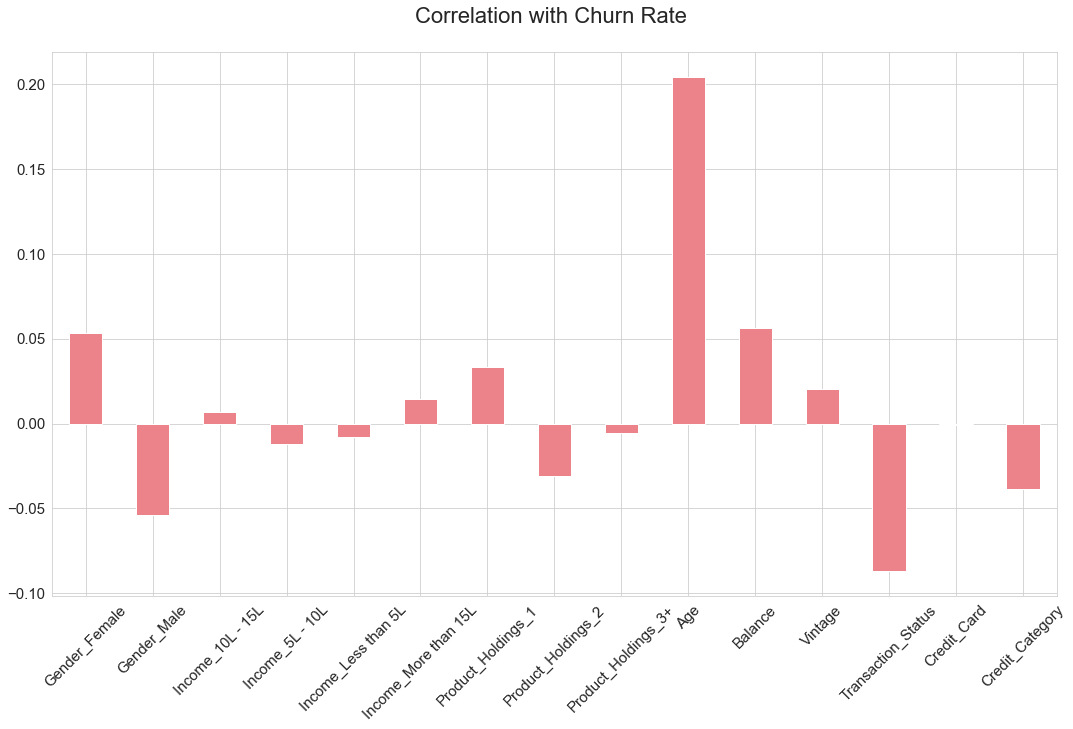

In [39]:
## Plot positive & negative correlations:
correlations = train_dummy.loc[:, train_dummy.columns!='Is_Churn'] .corrwith(train_dummy['Is_Churn'])
correlations = correlations[correlations!=1]
correlations.plot.bar(figsize = (18, 10), fontsize = 15, color = '#ec838a', rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

<h2 style="background-color:#660066;
           color:#FFF9ED;
           font-size:30px;
           font-family:Georgia;
           text-align:center;
           border-radius:10px 10px;">
    <strong>Check Multicollinearity using VIF:</strong></h2><br>  
    
Let’s try to look into multicollinearity using Variable Inflation Factors (VIF). Unlike Correlation matrix, VIF determines the strength of the correlation of a variable with a group of other independent variables in a dataset. VIF starts usually at 1 and anywhere exceeding 10 indicates high multicollinearity between the independent variables.

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [ variance_inflation_factor( X.values, i) 
    for i in range(X.shape[1])]
    return(vif)


calc_vif(train_dummy.loc[:, train_dummy.columns!='Is_Churn']).sort_values(by='VIF', ascending=False)

variables           VIF
2       Income_10L - 15L           inf
7     Product_Holdings_2           inf
8    Product_Holdings_3+           inf
5   Income_More than 15L  2.907112e+07
1            Gender_Male  7.543067e+06
3        Income_5L - 10L  1.135760e+06
6     Product_Holdings_1  9.380692e+05
0          Gender_Female  7.947471e+04
4    Income_Less than 5L  3.883031e+04
10               Balance  1.072925e+00
12    Transaction_Status  1.002967e+00
11               Vintage  1.002871e+00
9                    Age  1.002098e+00
14       Credit_Category  1.001730e+00
13           Credit_Card  1.001526e+00

Gender_Male has high vif, we will delete that column

# <span style='color:Blue'> Delete variables  </span>


In [41]:
train_dummy.drop(columns=['Gender_Male','Product_Holdings_2','Income_5L - 10L'],inplace=True)
#train_dummy.drop(columns=['Gender_Male'],inplace=True)


# <span style='color:Blue'> Check VIF again  </span>

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [ variance_inflation_factor( X.values, i) 
    for i in range(X.shape[1])]
    return(vif)


calc_vif(train_dummy.loc[:, train_dummy.columns!='Is_Churn']).sort_values(by='VIF', ascending=False)

variables       VIF
6                    Age  4.167285
7                Balance  3.255376
8                Vintage  2.914928
10           Credit_Card  2.645338
4     Product_Holdings_1  2.068797
9     Transaction_Status  1.962048
1       Income_10L - 15L  1.841648
11       Credit_Category  1.831220
0          Gender_Female  1.756595
2    Income_Less than 5L  1.661755
3   Income_More than 15L  1.604634
5    Product_Holdings_3+  1.075955

<h2 style="background-color:#660066;
           color:#FFF9ED;
           font-size:30px;
           font-family:Georgia;
           text-align:center;
           border-radius:10px 10px;">
    <strong>Checking Feature Importance</strong></h2><br>  

In [43]:
X = train_dummy.loc[:, train_dummy.columns!='Is_Churn']  #independent columns
y = train_dummy['Is_Churn']    #target column

With feature importance we can understand which features are very important for price prediction 

[(0.02496618915823495, 'Gender_Female'), (0.036610454024415984, 'Income_10L - 15L'), (0.03677877411792591, 'Income_Less than 5L'), (0.032599665709396826, 'Income_More than 15L'), (0.03571449217089689, 'Product_Holdings_1'), (0.015759410983937336, 'Product_Holdings_3+'), (0.22788160279420278, 'Age'), (0.2829238812023469, 'Balance'), (0.1571758783185869, 'Vintage'), (0.011489845146136036, 'Transaction_Status'), (0.051564476284266705, 'Credit_Card'), (0.08653533008965279, 'Credit_Category')]


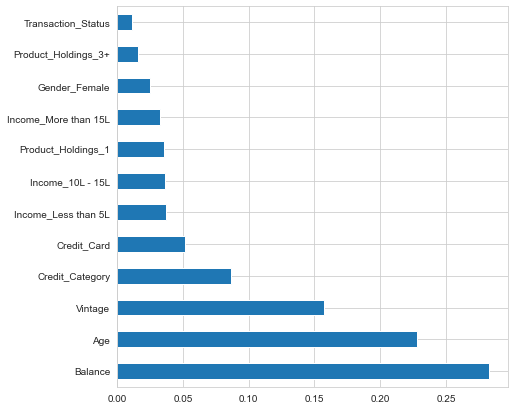

In [44]:
plt.figure(figsize=(7,7))

model = ExtraTreesRegressor()
model.fit(X,y)

#plot graph of feature importances for better visualization
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

feature_importances.nlargest(len(train_dummy.columns)).plot(kind='barh')

print(list(zip(model.feature_importances_,feature_importances.index)))
plt.show()

In [45]:
print("The following are the top {} features(columns) in the order of decreasing importance to predict churn.".format(len(train_dummy.columns)),'\n')
print(feature_importances.nlargest(len(train_dummy.columns)).index.tolist())

The following are the top 13 features(columns) in the order of decreasing importance to predict churn. 

['Balance', 'Age', 'Vintage', 'Credit_Category', 'Credit_Card', 'Income_Less than 5L', 'Income_10L - 15L', 'Product_Holdings_1', 'Income_More than 15L', 'Gender_Female', 'Product_Holdings_3+', 'Transaction_Status']


* Balance, Age and Vintage are very important columns

## Recursive Feature Elimination
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [46]:
data_final_vars=train_dummy.columns.values.tolist()

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

rfe = RFE(logreg)
rfe = rfe.fit(X, y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
print(rfe.feature_names_in_)

[ True False False False False False  True  True  True  True False  True]
[1 4 6 2 3 5 1 1 1 1 7 1]
['Gender_Female' 'Income_10L - 15L' 'Income_Less than 5L'
 'Income_More than 15L' 'Product_Holdings_1' 'Product_Holdings_3+' 'Age'
 'Balance' 'Vintage' 'Transaction_Status' 'Credit_Card' 'Credit_Category']


The RFE has helped us select the following features:'Gender_Female' 'Age'
 'Balance' 'Vintage' 'Transaction_Status' 'Credit_Category'

In [47]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.540058
         Iterations 6
                           Results: Logit
Model:                 Logit             Pseudo R-squared:  0.001    
Dependent Variable:    Is_Churn          AIC:               7206.7712
Date:                  2022-03-15 16:29  BIC:               7288.3997
No. Observations:      6650              Log-Likelihood:    -3591.4  
Df Model:              11                LL-Null:           -3595.2  
Df Residuals:          6638              LLR p-value:       0.74156  
Converged:             1.0000            Scale:             1.0000   
No. Iterations:        6.0000                                        
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
Gender_Female         0.0061   0.0567   0.1084 0.9136 -0.1049  0.1172
Income_10L - 15L

The p-values for most of the variables are smaller than 0.05, except one variables, therefore, we will remove it later.

<h1 style="background-color:#e00d73;
           color:#FFF9ED;
           font-size:40px;
           font-family:Georgia;
           text-align:center;
           border-radius:10px 10px;">
    <strong>Choosing baseline model for our dataset :</strong></h1><br>


In [48]:
# Test train split
from sklearn.model_selection import train_test_split

#X = train_dummy.loc[:, train_dummy.columns!='Is_Churn']  #independent columns
#y = train_dummy['Is_Churn']    #target column


#X = train_dummy[['Gender_Female', 'Age' ,'Balance','Transaction_Status','Credit_Category']]  #independent columns
#y = train_dummy['Is_Churn'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<h2 style="background-color:#660066;
           color:#FFF9ED;
           font-size:30px;
           font-family:Georgia;
           text-align:center;
           border-radius:10px 10px;">
    <strong> Model Building and comparison</strong></h2><br>  

In [49]:
## ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve

models=[]
models.append(('Logistic Regression',LogisticRegression(solver='liblinear', random_state = 0,class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('xgb_model',xgb.XGBClassifier(max_depth=5, learning_rate=0.08, eval_metric = "logloss", objective= 'binary:logistic',n_jobs=-1, random_state = 0)))
models.append(('linear SVM', SVC(kernel = 'linear', random_state = 0)))
models.append(('rbf SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Decision Tree Classifier',DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))

names=[]
accuracy_=[]
roc_auc_=[]

for name,model in models:
    k_fold=model_selection.KFold(n_splits=10,shuffle=True,random_state=7)
    accuracy_score=model_selection.cross_val_score(model,X_train,y_train,cv=k_fold,scoring="accuracy")
    roc_auc_score=model_selection.cross_val_score(model,X_train,y_train,cv=k_fold,scoring="roc_auc")

    accuracy_.append(accuracy_score)
    roc_auc_.append(roc_auc_score)
    names.append(name)
    print(name,accuracy_score.mean().round(2),accuracy_score.std().round(3),
          roc_auc_score.mean().round(2),roc_auc_score.std().round(3))

Logistic Regression 0.62 0.016 0.66 0.031
Random Forest 0.75 0.023 0.59 0.029
Gaussian NB 0.77 0.024 0.64 0.028
xgb_model 0.77 0.02 0.64 0.02
linear SVM 0.77 0.019 0.53 0.04
rbf SVM 0.77 0.019 0.59 0.031
KNN 0.73 0.017 0.54 0.025
Decision Tree Classifier 0.66 0.027 0.53 0.021


In [50]:
def Average(lst):
    return sum(lst) / len(lst)

results_df = pd.DataFrame(columns=['Algorithm','mean_accuracy','mean_rocauc'])
results_df.Algorithm,results_df.mean_accuracy,results_df.mean_rocauc= names,accuracy_,roc_auc_

results_df['mean_accuracy'] = results_df['mean_accuracy'].apply(lambda x: Average(x).round(2))
results_df['mean_rocauc'] = results_df['mean_rocauc'].apply(lambda x: Average(x).round(2))
results_df

Algorithm  mean_accuracy  mean_rocauc
0       Logistic Regression           0.62         0.66
1             Random Forest           0.75         0.59
2               Gaussian NB           0.77         0.64
3                 xgb_model           0.77         0.64
4                linear SVM           0.77         0.53
5                   rbf SVM           0.77         0.59
6                       KNN           0.73         0.54
7  Decision Tree Classifier           0.66         0.53

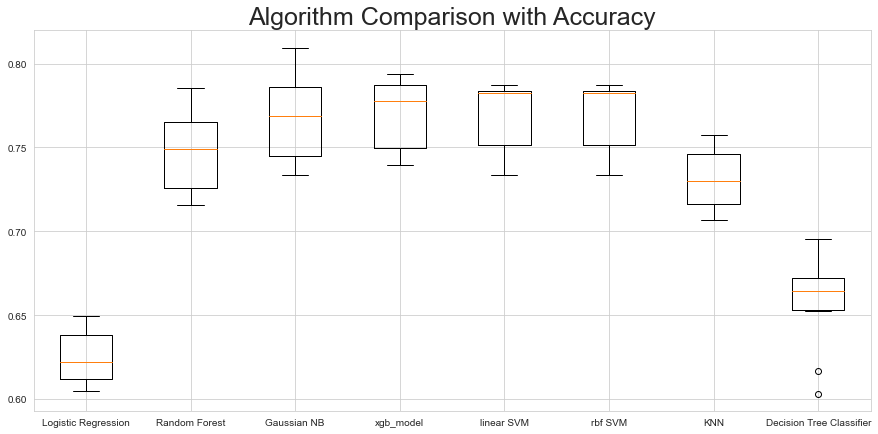

In [51]:
fig = plt.figure(figsize=(15,7))
plt.boxplot(accuracy_,labels=names)
plt.title('Algorithm Comparison with Accuracy',fontsize=25)
plt.show()

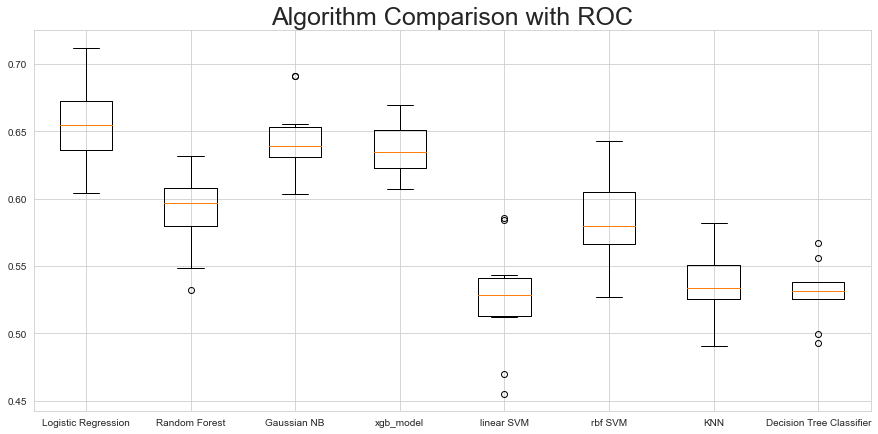

In [52]:
fig = plt.figure(figsize=(15,7))
plt.boxplot(roc_auc_,labels=names)
plt.title('Algorithm Comparison with ROC',fontsize=25)
plt.show()

<h2 style="background-color:#660066;
           color:#FFF9ED;
           font-size:30px;
           font-family:Georgia;
           text-align:center;
           border-radius:10px 10px;">
    <strong> Logistic regression Model before SMOTE</strong></h2><br>  

In [53]:
# Test train split
#from sklearn.model_selection import train_test_split

#X = train_dummy.loc[:, train_dummy.columns!='Is_Churn']  #independent columns
#y = train_dummy['Is_Churn']    #target column 



#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [54]:
logreg = LogisticRegression()

In [55]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.77


In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix_logreg = confusion_matrix(y_test, y_pred)
confusion_matrix_logreg

array([[1261,   16],
       [ 368,   18]], dtype=int64)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.99      0.87      1277
           1       0.53      0.05      0.09       386

    accuracy                           0.77      1663
   macro avg       0.65      0.52      0.48      1663
weighted avg       0.72      0.77      0.69      1663



In [58]:
tn, fp, fn, tp = confusion_matrix_logreg.ravel()
(tn, fp, fn, tp)

(1261, 16, 368, 18)

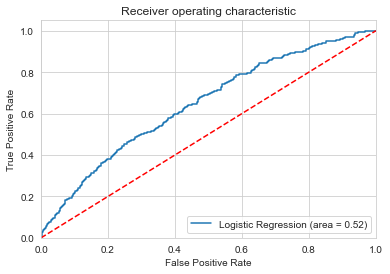

In [59]:
## ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<h2 style="background-color:#660066;
           color:#FFF9ED;
           font-size:30px;
           font-family:Georgia;
           text-align:center;
           border-radius:10px 10px;">
    <strong> Randomforest model</strong></h2><br>  

In [60]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
# Create a Random forest Classifier
randomforest=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)

# Train the model using the training sets
randomforest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=5,
                       n_estimators=500)

In [61]:
# using the feature importance variable
feature_imp = pd.Series(randomforest.feature_importances_, index = X.columns).sort_values(ascending = False)
feature_imp

Age                     0.374472
Balance                 0.260839
Vintage                 0.087551
Transaction_Status      0.057773
Credit_Category         0.050267
Gender_Female           0.030933
Credit_Card             0.029008
Product_Holdings_1      0.028233
Income_10L - 15L        0.022642
Income_More than 15L    0.021242
Income_Less than 5L     0.020957
Product_Holdings_3+     0.016082
dtype: float64

In [62]:
y_pred = randomforest.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(randomforest.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.77


In [63]:
confusion_matrix_randomforest = confusion_matrix(y_test, y_pred)
confusion_matrix_randomforest

array([[1274,    3],
       [ 383,    3]], dtype=int64)

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1277
           1       0.50      0.01      0.02       386

    accuracy                           0.77      1663
   macro avg       0.63      0.50      0.44      1663
weighted avg       0.71      0.77      0.67      1663



<h2 style="background-color:#660066;
           color:#FFF9ED;
           font-size:30px;
           font-family:Georgia;
           text-align:center;
           border-radius:10px 10px;">
    <strong> XGB model</strong></h2><br>  

In [65]:
#building the model & printing the score
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, eval_metric = "logloss",objective= 'binary:logistic',n_jobs=-1)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86      1277
           1       0.45      0.06      0.10       386

    accuracy                           0.76      1663
   macro avg       0.61      0.52      0.48      1663
weighted avg       0.70      0.76      0.69      1663



In [66]:
confusion_matrix_xgb_model = confusion_matrix(y_test, y_pred)
confusion_matrix_xgb_model

array([[1250,   27],
       [ 364,   22]], dtype=int64)

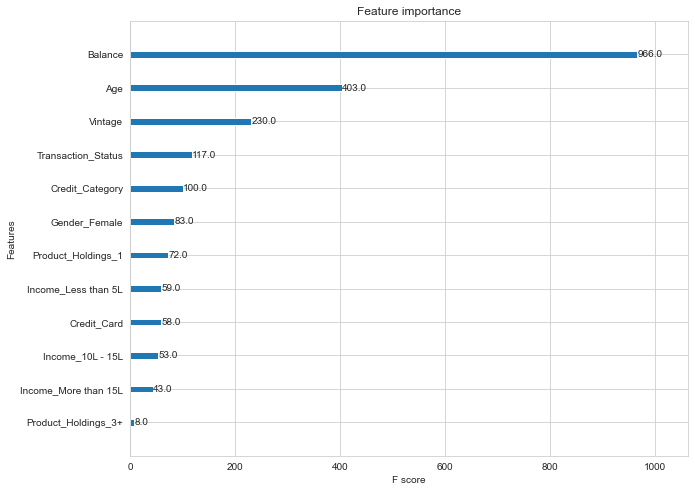

In [67]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_model, ax=ax);

<h1 style="background-color:#e00d73;
           color:#FFF9ED;
           font-size:40px;
           font-family:Georgia;
           text-align:center;
           border-radius:10px 10px;">
    <strong>Addressing Class imbalance :</strong></h1><br>

In [68]:
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (4987, 12)
Number transactions y_train dataset:  (4987,)
Number transactions X_test dataset:  (1663, 12)
Number transactions y_test dataset:  (1663,)


In [69]:
print("Before OverSampling, counts of label '1'-Churn: {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0'-Not Churn: {}".format(sum(y_train == 0)))

Before OverSampling, counts of label '1'-Churn: 1151
Before OverSampling, counts of label '0'-Not Churn: 3836


In [70]:
# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_res, y_res = sm.fit_resample(X, y.ravel())

X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, random_state=0)

In [71]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (7669, 12)
After OverSampling, the shape of train_y: (7669,) 

After OverSampling, counts of label '1': 3833
After OverSampling, counts of label '0': 3836


<h2 style="background-color:#660066;
           color:#FFF9ED;
           font-size:30px;
           font-family:Georgia;
           text-align:center;
           border-radius:10px 10px;">
    <strong> Model Building and comparison</strong></h2><br>  

In [72]:
models=[]
models.append(('Logistic Regression',LogisticRegression(solver='liblinear', random_state = 0,class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('xgb_model',xgb.XGBClassifier(max_depth=5, learning_rate=0.08,eval_metric = "logloss", objective= 'binary:logistic',n_jobs=-1, random_state = 0)))
models.append(('linear SVM', SVC(kernel = 'linear', random_state = 0)))
models.append(('rbf SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Decision Tree Classifier',DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))

names=[]
accuracy_=[]
roc_auc_=[]

for name,model in models:
    k_fold=model_selection.KFold(n_splits=10,shuffle=True,random_state=7)
    accuracy_score=model_selection.cross_val_score(model,X_train_res,y_train_res,cv=k_fold,scoring="accuracy")
    roc_auc_score=model_selection.cross_val_score(model,X_train_res,y_train_res,cv=k_fold,scoring="roc_auc")

    accuracy_.append(accuracy_score)
    roc_auc_.append(roc_auc_score)
    names.append(name)
    print(name,accuracy_score.mean().round(2),accuracy_score.std().round(3),
          roc_auc_score.mean().round(2),roc_auc_score.std().round(3))

Logistic Regression 0.61 0.017 0.66 0.018
Random Forest 0.8 0.012 0.87 0.008
Gaussian NB 0.62 0.018 0.66 0.017
xgb_model 0.8 0.012 0.87 0.01
linear SVM 0.61 0.015 0.66 0.017
rbf SVM 0.64 0.016 0.7 0.014
KNN 0.69 0.016 0.75 0.012
Decision Tree Classifier 0.73 0.016 0.73 0.016


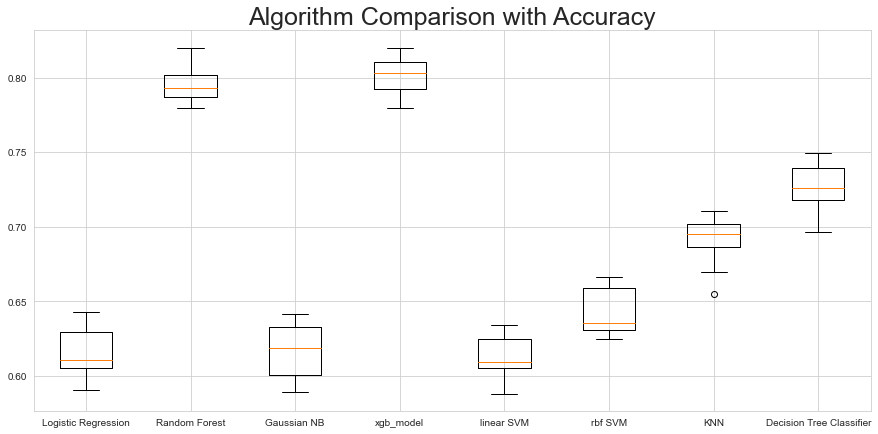

In [73]:
fig = plt.figure(figsize=(15,7))
plt.boxplot(accuracy_,labels=names)
plt.title('Algorithm Comparison with Accuracy',fontsize=25)
plt.show()

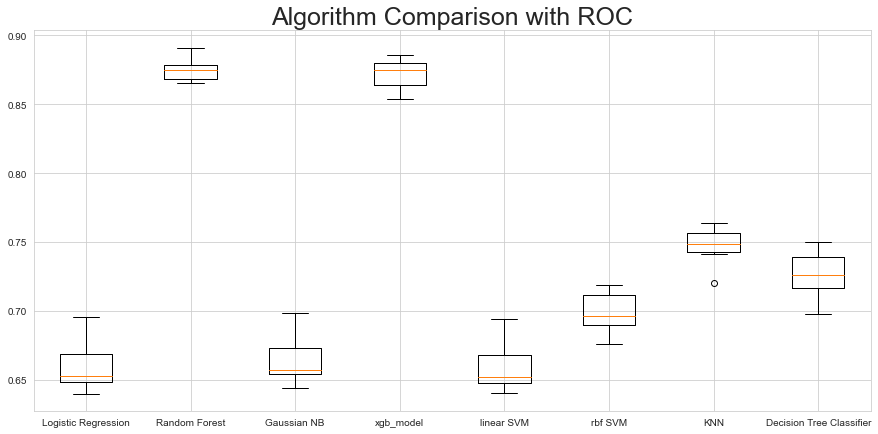

In [74]:
fig = plt.figure(figsize=(15,7))
plt.boxplot(roc_auc_,labels=names)
plt.title('Algorithm Comparison with ROC',fontsize=25)
plt.show()

<h2 style="background-color:#660066;
           color:#FFF9ED;
           font-size:30px;
           font-family:Georgia;
           text-align:center;
           border-radius:10px 10px;">
    <strong> Logistic regression Model AFTER SMOTE</strong></h2><br>  

In [75]:
logreg_smote = LogisticRegression()
logreg_smote.fit(X_train_res, y_train_res.ravel())
y_pred_smote = logreg_smote.predict(X_test_res)
  
# print classification report
print(classification_report(y_test_res, y_pred_smote))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63      1277
           1       0.63      0.64      0.64      1280

    accuracy                           0.63      2557
   macro avg       0.63      0.63      0.63      2557
weighted avg       0.63      0.63      0.63      2557



In [76]:
confusion_matrix(y_test_res, y_pred_smote)


array([[802, 475],
       [463, 817]], dtype=int64)

<h2 style="background-color:#660066;
           color:#FFF9ED;
           font-size:30px;
           font-family:Georgia;
           text-align:center;
           border-radius:10px 10px;">
    <strong> Random forest Model AFTER SMOTE</strong></h2><br> 

In [77]:
randomforest_smote=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)

# Train the model using the training sets
randomforest_smote.fit(X_train_res, y_train_res.ravel())
y_pred_smoterf = randomforest_smote.predict(X_test_res)
# print classification report
print(classification_report(y_test_res, y_pred_smoterf))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69      1277
           1       0.69      0.78      0.73      1280

    accuracy                           0.71      2557
   macro avg       0.72      0.71      0.71      2557
weighted avg       0.72      0.71      0.71      2557



<h2 style="background-color:#660066;
           color:#FFF9ED;
           font-size:30px;
           font-family:Georgia;
           text-align:center;
           border-radius:10px 10px;">
    <strong> XGB AFTER SMOTE</strong></h2><br> 

In [78]:
xgb_model_SMOTE = xgb.XGBClassifier(max_depth=5, learning_rate=0.1, eval_metric = "logloss", objective= 'binary:logistic',n_jobs=-1)
xgb_model_SMOTE.fit(X_train_res, y_train_res.ravel())
y_pred_smotexgb = xgb_model_SMOTE.predict(X_test_res)
print(classification_report(y_test_res, y_pred_smotexgb))

              precision    recall  f1-score   support

           0       0.75      0.91      0.83      1277
           1       0.89      0.70      0.79      1280

    accuracy                           0.81      2557
   macro avg       0.82      0.81      0.81      2557
weighted avg       0.82      0.81      0.81      2557



<h2 style="background-color:#660066;
           color:#FFF9ED;
           font-size:30px;
           font-family:Georgia;
           text-align:center;
           border-radius:10px 10px;">
    <strong> Gaussian Naive Bayes Model </strong></h2><br> 

In [79]:
nb = GaussianNB()
nb.fit(X_train_res, y_train_res.ravel())
y_pred_nb = xgb_model_SMOTE.predict(X_test_res)
print(classification_report(y_test_res, y_pred_nb))

              precision    recall  f1-score   support

           0       0.75      0.91      0.83      1277
           1       0.89      0.70      0.79      1280

    accuracy                           0.81      2557
   macro avg       0.82      0.81      0.81      2557
weighted avg       0.82      0.81      0.81      2557



Though logistic regression has low macro avg score and low accuracy it has better performance.

# <span style='color:Blue'> Make Predictions on Test Data </span>


In [80]:
test_dummy = test_data.copy()

test_dummy.replace({'Credit_Category': {'Good': 1, 'Average': .5, 'Poor': 0}}, inplace=True)
#test_dummy.replace({'Product_Holdings': {'3+': 3, '2': 2, '1': 1}}, inplace=True)
#test_dummy.replace({'Income': {'Less than 5L': 1, '5L - 10L': 2, '10L - 15L': 3,'More than 15L':4}}, inplace=True)
test_dummy= pd.concat([pd.get_dummies(test_dummy[['Gender', 'Income','Product_Holdings']]), test_dummy[['Age', 'Balance','Vintage','Transaction_Status', 'Credit_Card', 'Credit_Category']]], axis=1)
test_dummy.drop(columns=['Gender_Male','Product_Holdings_2','Income_5L - 10L'],inplace=True)
#test_dummy.drop(columns=['Gender_Male'],inplace=True)
test_dummy.loc[:, ['Age', 'Balance', 'Vintage','Credit_Category']]= NormalizeData(test_dummy.loc[:, ['Age', 'Balance', 'Vintage','Credit_Category']])
#test_dummy.loc[:, ['Age', 'Balance', 'Vintage','Credit_Category', 'Income','Product_Holdings']]= NormalizeData(test_dummy.loc[:, ['Age', 'Balance', 'Vintage','Credit_Category', 'Income','Product_Holdings']])


In [81]:
y_predicted=logreg_smote.predict(test_dummy)

In [82]:
result=pd.DataFrame(y_predicted, index =list(test_data.ID)).rename(columns={0:'Is_Churn'}).rename_axis('ID')


In [83]:
submission = result
submission

Is_Churn
ID                
55480787         1
9aededf2         0
a5034a09         0
b3256702         0
dc28adb5         0
...            ...
19e40adf         1
52d5bc8d         1
f708121b         1
f008715d         1
36b81f59         1

[2851 rows x 1 columns]

In [84]:
submission['Is_Churn'].value_counts()

0    1661
1    1190
Name: Is_Churn, dtype: int64

In [85]:
# saving the dataframe
#submission.to_csv('EIGHT_SUBMISSION_LR_SMOTE.csv')